In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
df = pd.read_csv('creditcard.csv')  # Assuming 'df' is your DataFrame
# Replace 'target_column' with the name of your target variable
X = df.drop('target_column', axis=1)
y = df['target_column']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def calculate_woe_iv(df, feature, target):
    df = df[[feature, target]].copy()
    df['bucket'], bins = pd.qcut(df[feature], q=10, retbins=True, duplicates='drop')
    df_grouped = df.groupby('bucket', as_index=False)
    
    # Calculate WoE and IV for each bucket
    woedf = pd.DataFrame()
    woedf['bucket'] = df_grouped[feature].min()
    woedf['iv'] = 0
    woedf['woe'] = np.log((df_grouped[target].sum() / df_grouped[target].count()) / 
                         ((df[target].sum() - df_grouped[target].sum()) / (df[target].count() - df_grouped[target].count())))
    
    # Calculate Information Value
    for i in range(woedf.shape[0]):
        mask = df[feature].isin([woedf['bucket'][i]])
        woedf['iv'][i] = ((df[mask][target].sum() / df[mask][target].count()) - 
                          ((df[~mask][target].sum() / df[~mask][target].count())))
    
    return woedf


In [ ]:
def transform_using_woe(df, woedf, feature):
    df_copy = df.copy()
    df_copy['bucket'] = pd.cut(df_copy[feature], bins=woedf['bucket'], include_lowest=True, duplicates='drop')
    df_copy['woe'] = df_copy['bucket'].map(woedf.set_index('bucket')['woe'])
    df_copy.drop(['bucket'], axis=1, inplace=True)
    return df_copy


In [ ]:
# Choose the features for modeling
features = ['feature1', 'feature2', ...]

# Transform features using WoE
for feature in features:
    woedf = calculate_woe_iv(df, feature, 'target_column')
    X_train = transform_using_woe(X_train, woedf, feature)
    X_test = transform_using_woe(X_test, woedf, feature)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


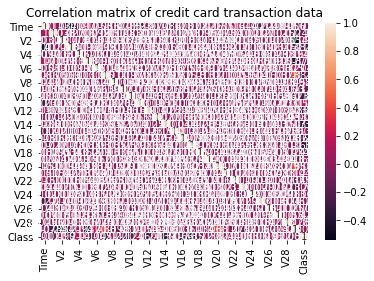

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv('creditcard.csv')  # Replace with your actual file path or URL

#



correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix of credit card transaction data")
plt.show()


AUPRC: 0.713862438305121


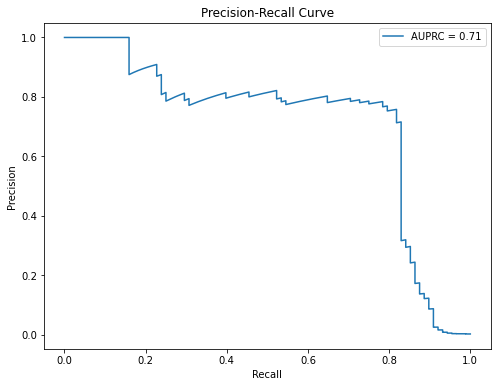

Confusion Matrix:
[[47860    12]
 [   41    47]]
Precision at default threshold: 1.00
Recall at default threshold: 0.00


In [11]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual file path or URL)
df = pd.read_csv('creditcard.csv')

# Specify the features of interest
selected_features = ["V2", "V3", "V10", "V14", "V18"]  # Features to include in the evaluation

# Assuming 'Class' is the column indicating fraud (1) or non-fraud (0)
X = df[selected_features]
y = df['Class']


df.dropna(inplace=True)
X_cleaned = X.dropna()
y_cleaned = y[X.index.isin(X_cleaned.index)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Train a logistic regression model (replace with your chosen model)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Calculate AUC for precision-recall curve
auprc = auc(recall, precision)

# Print AUPRC
print(f"AUPRC: {auprc}")

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Additional: Display confusion matrix
threshold = 0.5  # You may adjust the threshold based on your model's requirements
y_pred = (y_prob > threshold).astype(int)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Additional: Print key metrics
precision_at_default_threshold = precision[-1]
recall_at_default_threshold = recall[-1]
print(f"Precision at default threshold: {precision_at_default_threshold:.2f}")
print(f"Recall at default threshold: {recall_at_default_threshold:.2f}")
